In [975]:
import pandas as pd
import os
import numpy as np
from keras import utils
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorflow as tf

In [1177]:
question13 = pd.read_csv('/kaggle/input/datasetar/Data/Question_13.csv', sep=',')
question13.head()

,ID,Question,Réponse,Score
0,13,كم كان عدد الصَّلوات التي فرضها الله- تعالى- ع...,خمسون صلاةً,1.0
1,13,كم كان عدد الصَّلوات التي فرضها الله- تعالى- ع...,عدد الصلوات التي فرضها الله -تعالى- على المسلم...,2.0
2,13,كم كان عدد الصَّلوات التي فرضها الله- تعالى- ع...,في البداية، كان عدد الصلوات التي فرضها الله عل...,2.0
3,13,كم كان عدد الصَّلوات التي فرضها الله- تعالى- ع...,خمسون صلاة كانت العدد الأصلي للصلوات التي فُرِ...,2.0
4,13,كم كان عدد الصَّلوات التي فرضها الله- تعالى- ع...,قد فرض الله -تعالى- في البداية خمسون صلاة على ...,2.0


In [1178]:
question13['Score'].unique()

array([ 1.,  2.,  0., nan])

In [1197]:
# Supprimer les valeurs NaN de la colonne 'Score'
question13 = question13.dropna(subset=['Score'])

# Garder uniquement les valeurs 1, 2, et 0
allowed_values = [0, 1, 2]
question13_filtered = question13[question13['Score'].isin(allowed_values)]

# Afficher les valeurs uniques après filtration
print(question13_filtered['Score'].unique())


[1. 2. 0.]


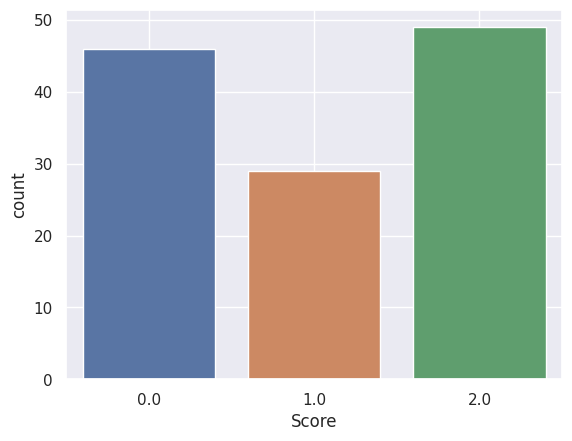

In [1198]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = question13, x= 'Score')
plt.grid(True)
plt.show()

In [1199]:
question13.isnull().sum()

ID          0
Question    0
Réponse     0
Score       0
dtype: int64

In [1200]:
rows_with_null_values = question13[question13['Réponse'].isnull()]

# Now you can display or inspect the rows
print(rows_with_null_values)

Empty DataFrame
Columns: [ID, Question, Réponse, Score]
Index: []


In [1201]:
# Assuming your DataFrame is named 'question4'
#
# question15.dropna(subset=['Réponse'], inplace=True)


In [1202]:
question13['Réponse'].isna().sum()

0

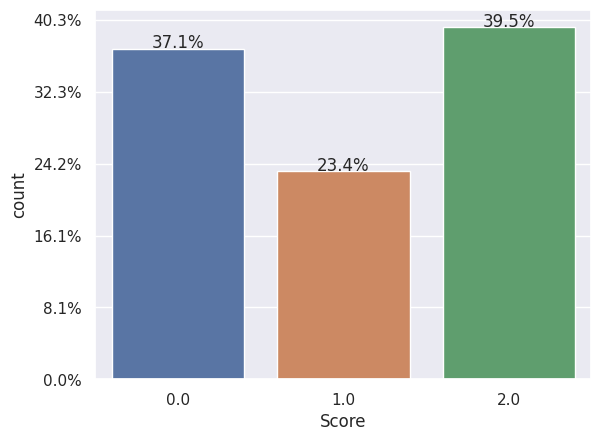

In [1203]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'data' is your DataFrame and 'Score' is a column in your DataFrame
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(data=question13, x='Score')

# Calculate the percentage of each category
total = len(question13)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center")

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.show()

In [1204]:
question13.shape

(124, 4)

In [1205]:
question13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 124
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        124 non-null    int64  
 1   Question  124 non-null    object 
 2   Réponse   124 non-null    object 
 3   Score     124 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


In [1206]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset
# Replace 'your_column' with the actual column name you want to check for duplicates

# Check for duplicates based on all columns
duplicate_rows = question13[question13.duplicated()]

# Check for duplicates based on a specific column
duplicate_rows_specific_column = question13[question13.duplicated(subset=['Réponse'])]

# Get the number of duplicates
num_duplicates = len(duplicate_rows)
num_duplicates_specific_column = len(duplicate_rows_specific_column)

print(f"Total duplicates: {num_duplicates}")
print(f"Duplicates in 'Réponse': {num_duplicates_specific_column}")


Total duplicates: 59
Duplicates in 'Réponse': 60


In [1116]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
!pip install -U nltk

In [1207]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
#stop_words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1208]:
#data avant stopwrds removed
question13['Réponse']

0                                            خمسون صلاةً
1      عدد الصلوات التي فرضها الله -تعالى- على المسلم...
2      في البداية، كان عدد الصلوات التي فرضها الله عل...
3      خمسون صلاة كانت العدد الأصلي للصلوات التي فُرِ...
4      قد فرض الله -تعالى- في البداية خمسون صلاة على ...
                             ...                        
119                                    خمسة وثمانون صلاة
120                                      مئة وعشرون صلاة
121                                      خمسة وستون صلاة
122                                     خمسة وسبعون صلاة
124                                           خمسون صلاة
Name: Réponse, Length: 124, dtype: object

In [1209]:
#Drop stop words
from nltk.stem.arlstem import ARLSTem
stemmmer = ARLSTem()

def remove_stowords(elements):
    corps = []
    for string in elements :
        string = nltk.sent_tokenize(string.strip())
        string = [ stemmmer.stem(word) for word in string if not word in stop_words ]
        string = ''.join(string)
        corps.append(string)
    return corps

In [1210]:
corps13 = remove_stowords(question13['Réponse'])

In [1086]:
#data after applying stopwords
# corps4

In [1211]:
# tokenization
from keras.preprocessing.text import Tokenizer,text_to_word_sequence , one_hot , text_to_word_sequence
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




# Train tokenization
tokenizer = Tokenizer(filters=''''!"#$%&()+,-./:;<=>?@[\\]^{|}~\t\n÷×؛<>()&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
#tokenizer = Tokenizer(filters='#' )

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(corps13)

with open('TokenizerModel13.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(corps13)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(s) for s in sequences)
sequences = pad_sequences(sequences, max_sequence_length)

# Get the word-to-index mapping
vocab_dict = tokenizer.word_index

# Calculate the vocabulary size
vocab_size = len(vocab_dict) + 1

#print(vocab_dict)

In [1212]:
max_sequence_length

12

In [1213]:
# vocab_dict

In [38]:
!pip3 install gensim

In [39]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format("/kaggle/input/fast-text-translation-data/fast_text_files/vectors/wiki.ar.vec")

In [1214]:
# Word Embedding
from keras.layers import Embedding
import numpy as np

# Embedding Dimension
EMBEDDING_DIM = 300

# Total number of words in the vocabulary, including an index for unknown words
num_words = len(vocab_dict) + 1

# Counter for words not present in the FastText model
count = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Iterate through each word in the vocabulary
for word, idx in vocab_dict.items():
    # Check if the word is present in the FastText model
    if word in fasttext_model:
        # If yes, assign the FastText model's embedding vector to the word in the matrix
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:
        # If the word is not present, increment the counter and print a message
        count += 1
        print("Word does not exist in the vocabulary ---> " + word)

       # Note: We could also assign a special embedding vector for unknown words.
        embedding_matrix[idx] = fasttext_model.get_vector("unk")

Word does not exist in the vocabulary ---> كالامر


In [1215]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54225999,  0.10713   ,  0.22708   , ...,  0.22496   ,
        -0.1864    , -0.063528  ],
       [ 0.087478  ,  0.04968   ,  0.20388   , ..., -0.054158  ,
        -0.0082092 ,  0.40757   ],
       ...,
       [ 0.16508   ,  0.19840001, -0.14619   , ..., -0.13265   ,
        -0.016581  ,  0.14132001],
       [ 0.40810999,  0.29166999, -0.13060001, ..., -0.024265  ,
        -0.12441   ,  0.36649999],
       [ 0.57666999,  0.26113999,  0.10029   , ..., -0.14012   ,
        -0.43338999,  0.12344   ]])

In [1216]:
X = sequences

In [1217]:
# X

In [1218]:
Score = question13['Score']
y = tf.keras.utils.to_categorical(
    Score, num_classes=3, dtype='float32'
)

In [1220]:
# y

In [1221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1222]:
y_test.shape

(25, 3)

In [1238]:
# from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from keras.layers import Dropout

input_dim=vocab_size
output_dim=33
input_length=max_sequence_length


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(LSTM(units=10,kernel_regularizer=l2(0.001)))
model.add(Dense(3, activation='softmax'))

Epoch 1/80
2/2 [==============================] - 3s 485ms/step - loss: 1.1322 - accuracy: 0.4141 - val_loss: 1.1282 - val_accuracy: 0.6000
Epoch 2/80
2/2 [==============================] - 0s 163ms/step - loss: 1.1254 - accuracy: 0.6162 - val_loss: 1.1217 - val_accuracy: 0.7200
Epoch 3/80
2/2 [==============================] - 0s 164ms/step - loss: 1.1187 - accuracy: 0.6465 - val_loss: 1.1150 - val_accuracy: 0.8000
Epoch 4/80
2/2 [==============================] - 0s 162ms/step - loss: 1.1118 - accuracy: 0.7273 - val_loss: 1.1082 - val_accuracy: 0.8400
Epoch 5/80
2/2 [==============================] - 0s 162ms/step - loss: 1.1051 - accuracy: 0.7172 - val_loss: 1.1012 - val_accuracy: 0.8400
Epoch 6/80
2/2 [==============================] - 0s 45ms/step - loss: 1.0978 - accuracy: 0.7172 - val_loss: 1.0939 - val_accuracy: 0.8400
Epoch 7/80
2/2 [==============================] - 0s 34ms/step - loss: 1.0905 - accuracy: 0.7273 - val_loss: 1.0863 - val_accuracy: 0.8400
Epoch 8/80
2/2 [======

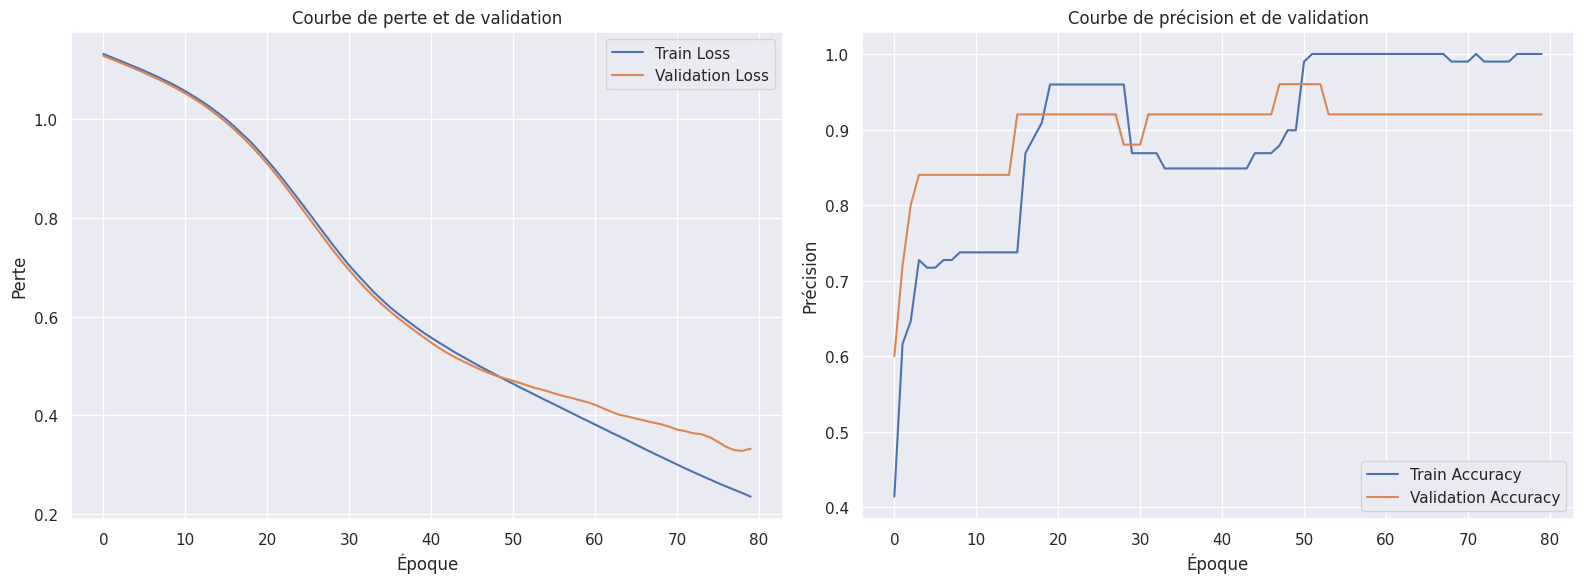

In [1239]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64, epochs=80, verbose=1)



plt.figure(figsize=(16, 6))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()


# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [1240]:
scores_trainig = model.evaluate(X_train, y_train, verbose=1)
print("Training Loss: %f%%" % (scores_trainig[0]))
print("Training Accuracy: %.2f%%" % (scores_trainig[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 1.0000
Training Loss: 0.230267%
Training Accuracy: 100.00%


In [1241]:
scores_test = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: %f%%" % (scores_test[0]))
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))

1/1 [==============================] - 0s 26ms/step - loss: 0.3326 - accuracy: 0.9200
Test Loss: 0.332616%
Test Accuracy: 92.00%


In [1242]:
import numpy as np

def predict_sequence(model,response):
    
    response= remove_stowords(response)
    #print(corps)
# Convert texts to sequences of integers
    sequences = tokenizer.texts_to_sequences(response)

# Pad sequences to ensure uniform length

    sequences = pad_sequences(sequences, max_sequence_length)
   
    
    #print(sequences)
    # Reshape the input for model prediction
    #input_data = np.array([sequences])
    
    #print(input_data)
    # Make predictions
    predicted_probs = model.predict(sequences)
    predicted_value= np.argmax(predicted_probs, axis=1)
    
    #print(predicted_classes)
   
    return predicted_value[0]

In [1245]:
test=['فرض الله خمسون صلاة في البداية']

In [1246]:
predict_sequence(model,test)

1/1 [==============================] - 0s 20ms/step


2

In [1247]:
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model13.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
